In [1797]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

In [1798]:
CSV=pd.read_csv('Data.csv')
data=np.array(CSV)
data=data[:,0:5]
input1=data.reshape(10,5)
output=np.random.randint(0,2,len(input1)).reshape(len(input1),1)
trainx,testx,trainy,testy=train_test_split(input1, output, test_size=0.4, shuffle=False)
cvx,testx,cvy,testy=train_test_split(testx,testy, test_size=0.5,shuffle=False)


In [1799]:
def Neural_Net(x,t,y):
    theta=(np.random.randn(25).reshape(5,5))*(np.sqrt(2/len(x[0])))
    b=np.random.rand(5).reshape(5,1)
    dimensions=np.array([5,4,3,1])
    A=[]
    Z=[]
    weights=[]
    bias=[]
    for i in range(0,len(dimensions)):
        weights.append(theta)
        bias.append(b)
        z=[]
        z1=[]
        for j in range(0,len(theta)):
            z.append(np.dot(x,theta[j].T)+b[j])
            z1=np.array(z) 
        Z.append(z1.T)    
        a=1/(1+np.exp(-z1))
        x=a.T
        A.append(x)
        if i==(len(dimensions)-1):
            break
        theta=(np.random.randn(dimensions[i]*dimensions[i+1]).reshape(dimensions[i+1],dimensions[i]))*(np.sqrt(2/len(x[0])))
        b=(np.random.randn(dimensions[i+1]).reshape(dimensions[i+1],1)) 
    dz=A[len(dimensions)-1]-y
    for i in range(len(dimensions)-1,-1,-1):
        a=A[i-1]
        temp=dz
        dw=np.mean(np.dot(a.T,dz),axis=1)
        db=np.mean(dz,axis=0)
        db=db.reshape(len(db),1)
        b=bias[i]
        w=weights[i] 
        w=w-0.21*dw
        b=b-0.21*db
        weights[i]=w
        bias[i]=b
        dz=np.dot(temp,w)*(a*(1-a))   
    Jtheta=np.zeros(500)
    for q in range(0,len(Jtheta)):
        x=t
        dimensions=np.array([5,4,3,1])
        A=[]
        Z=[]
        for i in range(0,len(dimensions)):
            z=[]
            z1=[]
            theta=weights[i]
            b=bias[i]
            for j in range(0,len(theta)):
                z.append(np.dot(x,theta[j].T)+b[j])
                z1=np.array(z) 
            Z.append(z1.T)    
            a=1/(1+np.exp(-z1))
            x=a.T
            A.append(x)
            if i==(len(dimensions)-1):
                break
        dz=A[len(dimensions)-1]-y
        Jtheta[q]=np.mean(dz**2)
        for i in range(len(dimensions)-1,-1,-1):
            a=A[i-1]
            temp=dz
            dw=np.mean(np.dot(a.T,dz),axis=1)
            db=np.mean(dz,axis=0)
            db=db.reshape(len(db),1)
            w=weights[i]
            b=bias[i]
            w=w-0.21*dw
            b=b-0.21*db
            weights[i]=w
            bias[i]=b
            dz=np.dot(temp,w)*(a*(1-a))  
    Jtheta=Jtheta*100        
    return (Jtheta)

In [1800]:
x=trainx
tempx=x
y=trainy
cost=Neural_Net(x,tempx,y)

In [1801]:
x=cvx
tempx=x
y=cvy
cost1=Neural_Net(x,tempx,y)

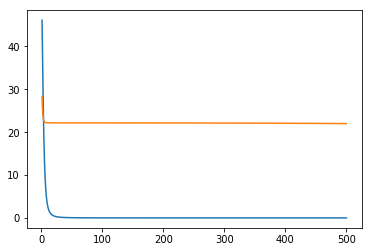

In [1802]:
iterations=np.arange(1,len(cost)+1,1)
plt.plot(iterations,cost1)
plt.plot(iterations,cost)
plt.show()